# MultiLabel Classification
- Toy Apples and Basketball dataset

---

## Import modules

In [1]:
# Standard
import pandas as pd
import matplotlib.pyplot as plt

# TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer

# ML
from sklearn.linear_model import LogisticRegression

# Train-Test split
from sklearn.model_selection import train_test_split

# AST
import ast

# Spacy
import spacy

# Make column transformer
from sklearn.compose import make_column_transformer

# Pipeline
from sklearn.pipeline import make_pipeline


## Configuration
Required to run the rest of the notebook for any dataset that has a Text column which serves as the features for a NLP multilable classification task

In [2]:
# Excel Datafile (if csv then change to pd.read_csv)
datafile = 'apples_and_basketball.xlsx'

# Features column
TEXT_CONTENT_COLUMN = "Text"

# Target
TARGET = "Label"


## Import Data

In [3]:
df = pd.read_excel(datafile)
df.shape

(12, 2)

In [4]:
df

,Text,Label
0,I eat apple,['apple']
1,I play basketball,['basketball']
2,I eat apple and play basketball,"['apple', 'basketball']"
3,I will play basketball,['basketball']
4,I will eat apple,['apple']
5,I will eat apple and will play basketball,"['apple', 'basketball']"
6,I like to eat apple and like to play basketball,"['apple', 'basketball']"
7,I like to eat apple,['apple']
8,I like to play basketball,['basketball']
9,I played basketball,['basketball']


## Data Preparation

#### 1. Convert label list imported as strings to lists

In [5]:
type(df[TARGET][0])

str

In [6]:
df['label_ast'] = df[TARGET].apply(lambda x: ast.literal_eval(x))
type(df['label_ast'][0])

list

In [7]:
df.head(2)

,Text,Label,label_ast
0,I eat apple,['apple'],[apple]
1,I play basketball,['basketball'],[basketball]


#### 2. Label Counts

In [8]:
df['label_count'] = df['label_ast'].apply(len)
df.head(3)

,Text,Label,label_ast,label_count
0,I eat apple,['apple'],[apple],1
1,I play basketball,['basketball'],[basketball],1
2,I eat apple and play basketball,"['apple', 'basketball']","[apple, basketball]",2


#### 3. Label Distribution

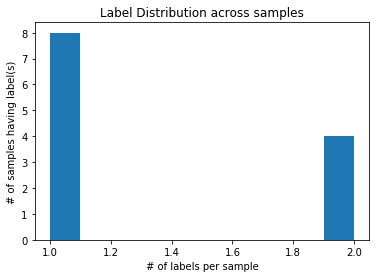

In [9]:
plt.hist(df['label_count'])
plt.title('Label Distribution across samples')
plt.xlabel('# of labels per sample')
plt.ylabel('# of samples having label(s)')
plt.show()

#### 4. Spacy Stopwords

In [10]:
from spacy.cli.download import download
download(model="en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [11]:
nlp_lg = spacy.load('en_core_web_lg')
nlp_lg

In [12]:
# Spacy stopwords

sp_stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Type   : ', type(sp_stopwords))
print('Length : ', len(sp_stopwords))

Type   :  <class 'set'>
Length :  326


#### 5. Vectorize Features using TFIDF

In [13]:
# Will use the spacy stopwords later
tfidf = TfidfVectorizer(stop_words='english')

In [14]:
tfidf.get_params();

In [15]:
# Vectorize the feature column using make_column_transformer 

preprocessor = make_column_transformer((tfidf, TEXT_CONTENT_COLUMN),  # "Test" 
                                       remainder='passthrough'
                                      )

## Pipeline - 1
- 1 step pipeline of vectorizing feature column using TFIDF and re-producing the original df and the preprocessed df along with the other non-preprocessed columns
- Just for viewing and analysis

In [16]:
pipe1 = make_pipeline(preprocessor)
pipe1.fit(df)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tfidfvectorizer',
                                                  TfidfVectorizer(stop_words='english'),
                                                  'Text')]))])

In [17]:
# TDIDF processed array of df 
tfidf_processed_csr = pipe1.transform(df)

# Creating a df of the csr (just for analysis)
# Since we used "passthrough" from the other columns we
# need to provide their names to the processed df along
# with the tfidf feature names
df_processed = pd.DataFrame(tfidf_processed_csr, 
                            columns=preprocessor.named_transformers_.tfidfvectorizer.get_feature_names() + list(df.columns[-3:]))
df_processed.shape

(12, 10)

In [18]:
df_processed.head(3)

,apple,ate,basketball,eat,like,play,played,Label,label_ast,label_count
0,0.645328,0.0,0.0,0.763905,0.0,0.0,0.0,['apple'],[apple],1
1,0.0,0.0,0.645328,0.0,0.0,0.763905,0.0,['basketball'],[basketball],1
2,0.456316,0.0,0.456316,0.540163,0.0,0.540163,0.0,"['apple', 'basketball']","[apple, basketball]",2
